In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


11501568/11490434 [==============================] - 0s 0us/step


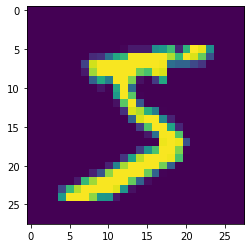

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()

In [4]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

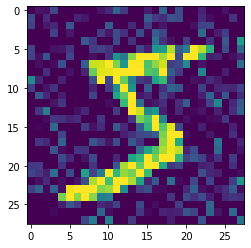

In [5]:
plt.imshow(train_images_noisy[0].reshape(28,28))
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=784))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.fit(train_images_noisy, train_images,
                epochs=50,
                batch_size=100,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/50
600/600 - 5s - loss: 0.1461 - 5s/epoch - 8ms/step
Epoch 2/50
600/600 - 2s - loss: 0.1128 - 2s/epoch - 3ms/step
Epoch 3/50
600/600 - 2s - loss: 0.1070 - 2s/epoch - 3ms/step
Epoch 4/50
600/600 - 2s - loss: 0.1043 - 2s/epoch - 3ms/step
Epoch 5/50
600/600 - 2s - loss: 0.1031 - 2s/epoch - 3ms/step
Epoch 6/50
600/600 - 2s - loss: 0.1023 - 2s/epoch - 3ms/step
Epoch 7/50
600/600 - 2s - loss: 0.1014 - 2s/epoch - 3ms/step
Epoch 8/50
600/600 - 2s - loss: 0.1008 - 2s/epoch - 3ms/step
Epoch 9/50
600/600 - 2s - loss: 0.1004 - 2s/epoch - 3ms/step
Epoch 10/50
600/600 - 2s - loss: 0.1004 - 2s/epoch - 3ms/step
Epoch 11/50
600/600 - 2s - loss: 0.0998 - 2s/epoch - 3ms/step
Epoch 12/50
600/600 - 2s - loss: 0.0999 - 2s/epoch - 3ms/step
Epoch 13/50
600/600 - 2s - loss: 0.0999 - 2s/epoch - 3ms/step
Epoch 14/50
600/600 - 2s - loss: 0.0996 - 2s/epoch - 3ms/step
Epoch 15/50
600/600 - 2s - loss: 0.0993 - 2s/epoch - 3ms/step
Epoch 16/50
600/600 - 2s - loss: 0.0994 - 2s/epoch - 3ms/step
Epoch 17/50
600/6

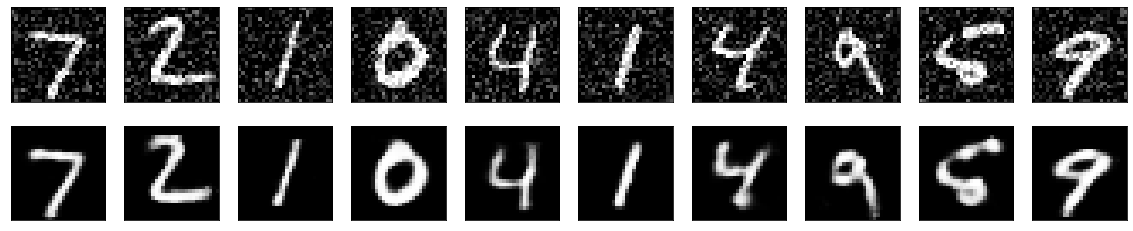

In [8]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
784*8

6272

In [ ]:
64*8

512